# Space Stock Portfolio Risk and Returns 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Space Stock
title = 'Space'
symbols = ['LORL','SRAC','SRACU','NPA', 'NPAUU', 'SPCE']
start = '2019-01-01'
end = '2021-01-14'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [5]:
number_of_years = delta.years

In [6]:
months = (d2.year - d1.year) * 12 + (d2.month - d1.month)
months

24

In [7]:
days = (df.index[-1] - df.index[0]).days
days

742

In [8]:
df.head()

,LORL,SRAC,SRACU,NPA,NPAUU,SPCE
Date,,,,,,
2019-01-02,26.904499,NaN,NaN,NaN,NaN,10.02
2019-01-03,27.107992,NaN,NaN,NaN,NaN,10.00
2019-01-04,27.994635,NaN,NaN,NaN,NaN,10.04
2019-01-07,28.212662,NaN,NaN,NaN,NaN,10.03
2019-01-08,28.445223,NaN,NaN,NaN,NaN,10.04


In [9]:
df.tail()

,LORL,SRAC,SRACU,NPA,NPAUU,SPCE
Date,,,,,,
2021-01-07,23.410000,16.049999,17.920000,12.78,14.4999,25.129999
2021-01-08,23.270000,16.280001,18.020000,12.69,13.9800,25.219999
2021-01-11,23.830000,15.700000,18.000000,12.52,14.6000,24.920000
2021-01-12,24.230000,16.000000,18.200001,12.70,14.5155,26.660000
2021-01-13,23.219999,17.070000,19.000000,13.35,14.6700,27.559999


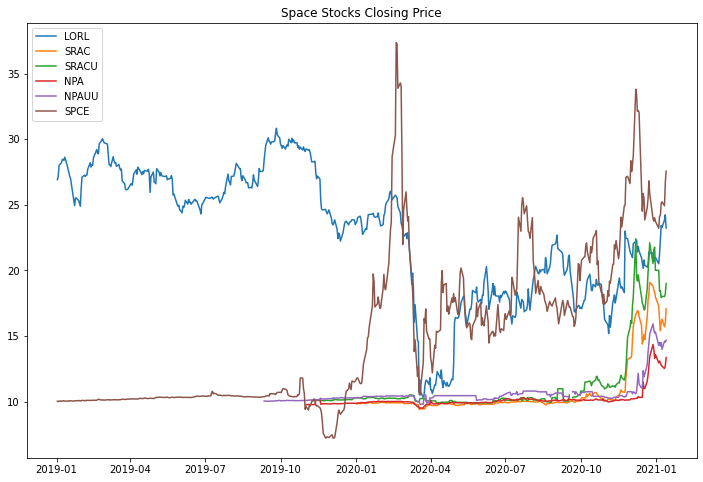

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Stocks Closing Price')
plt.legend(labels=df.columns)

In [11]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

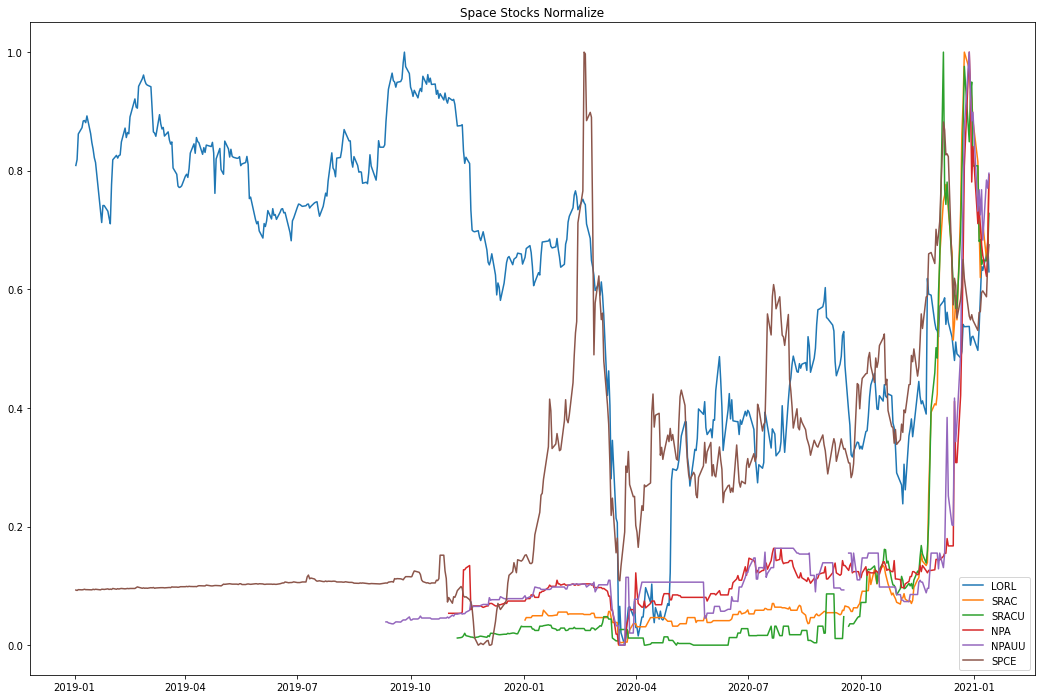

In [12]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [13]:
stock_rets = df.pct_change().dropna()

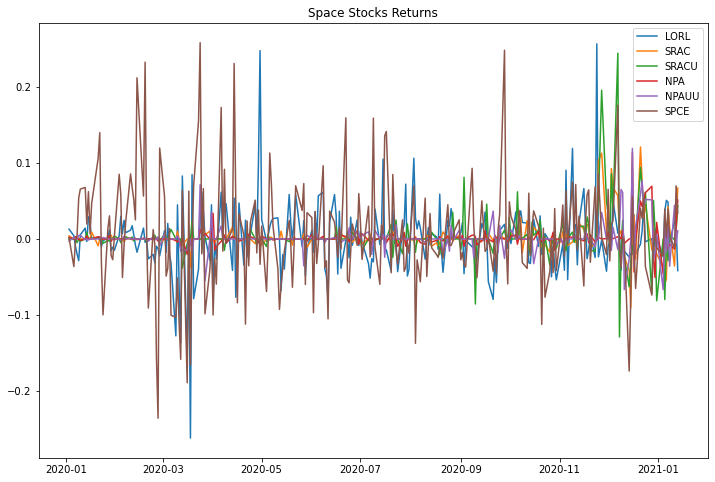

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title +' Stocks Returns')
plt.legend(labels=stock_rets.columns)

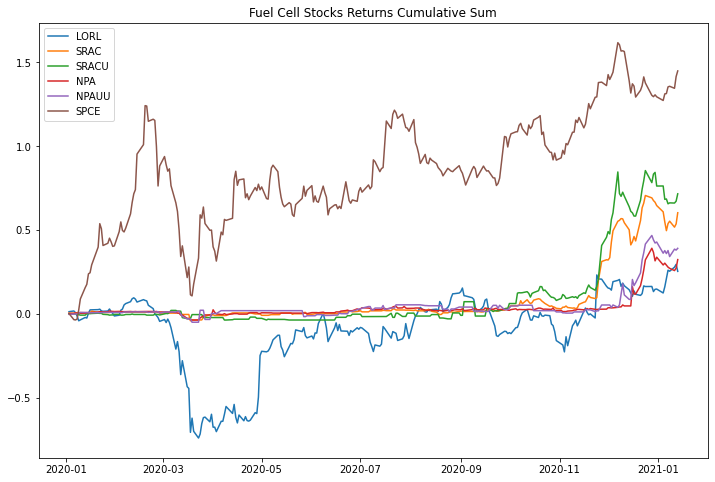

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Fuel Cell Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

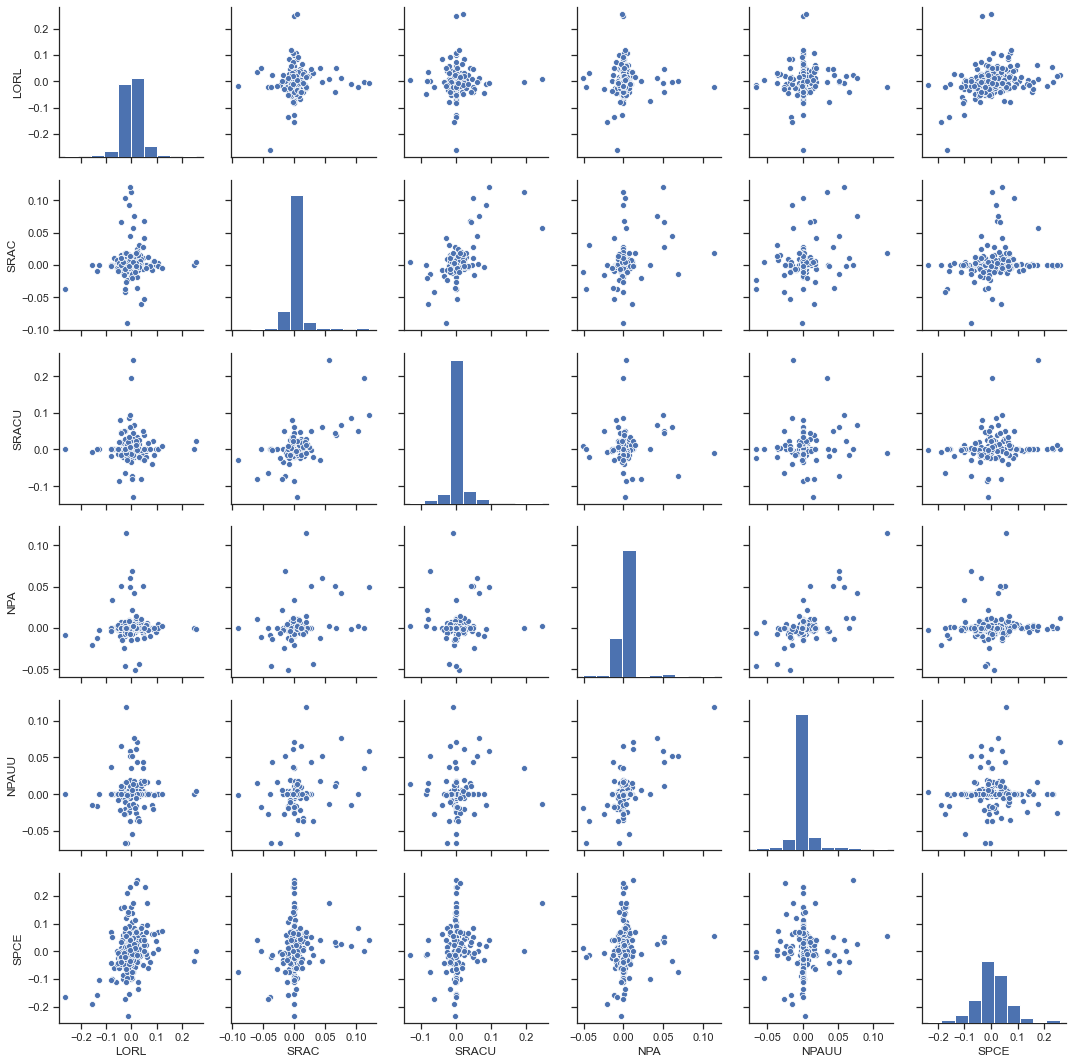

In [16]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

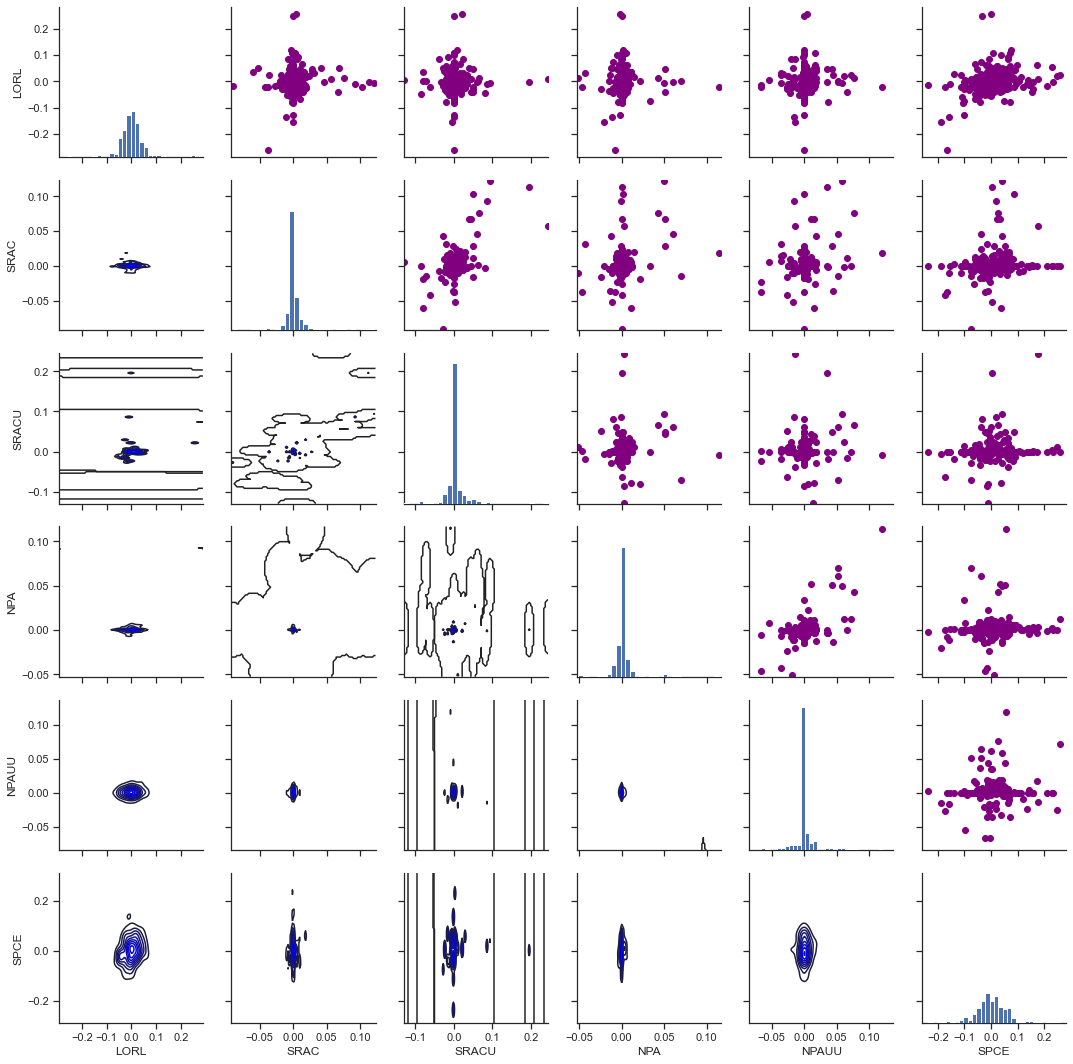

In [17]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

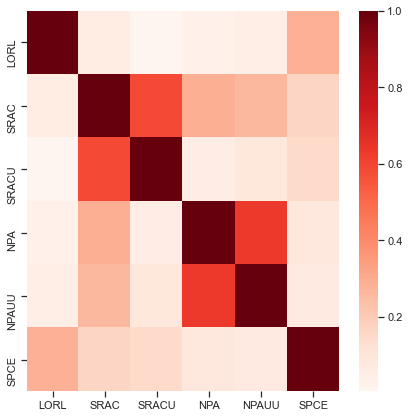

In [18]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

<AxesSubplot:>

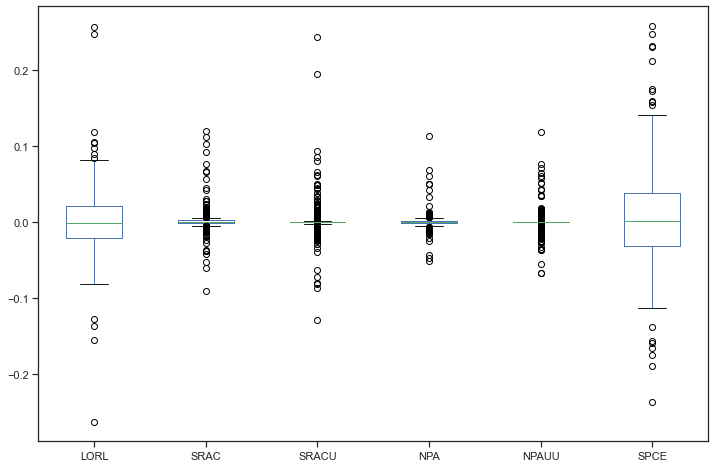

In [19]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

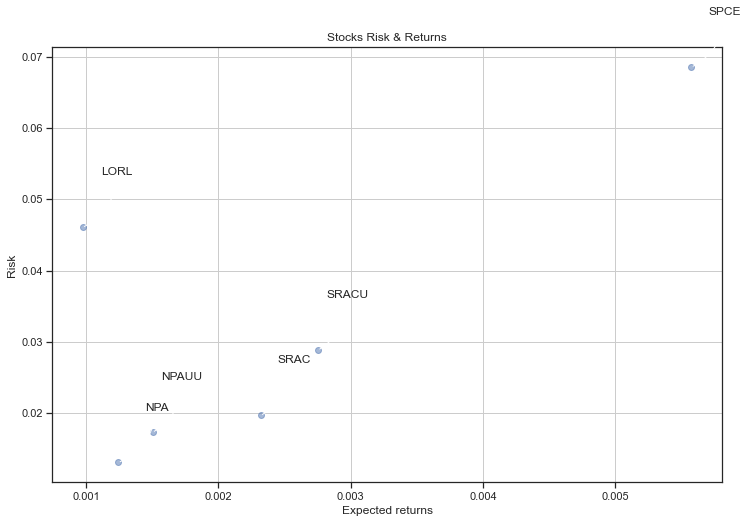

In [20]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

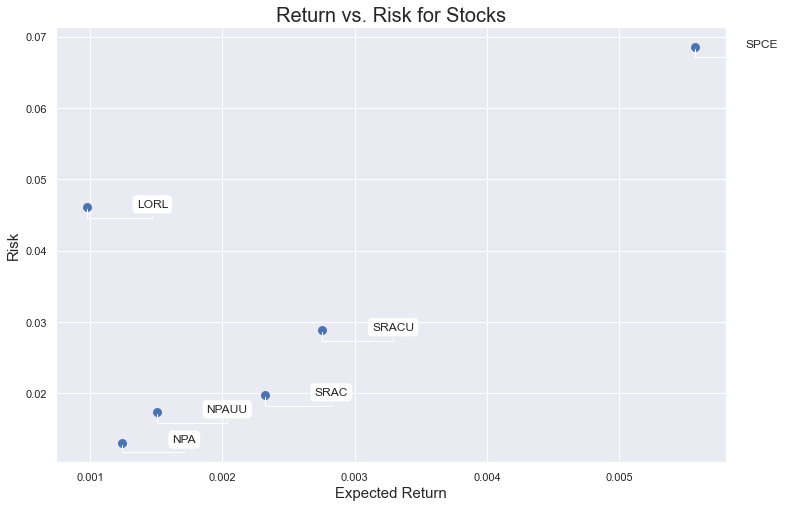

In [21]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [22]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

SPCE   SPCE     1.000000
NPAUU  NPAUU    1.000000
SRAC   SRAC     1.000000
SRACU  SRACU    1.000000
NPA    NPA      1.000000
LORL   LORL     1.000000
NPAUU  NPA      0.634821
NPA    NPAUU    0.634821
SRAC   SRACU    0.588666
SRACU  SRAC     0.588666
SRAC   NPA      0.291590
NPA    SRAC     0.291590
SPCE   LORL     0.287586
LORL   SPCE     0.287586
NPAUU  SRAC     0.264280
SRAC   NPAUU    0.264280
SPCE   SRAC     0.166537
SRAC   SPCE     0.166537
SPCE   SRACU    0.151304
SRACU  SPCE     0.151304
       NPAUU    0.091375
NPAUU  SRACU    0.091375
NPA    SPCE     0.080455
SPCE   NPA      0.080455
       NPAUU    0.074597
NPAUU  SPCE     0.074597
SRAC   LORL     0.060680
LORL   SRAC     0.060680
SRACU  NPA      0.057469
NPA    SRACU    0.057469
NPAUU  LORL     0.050799
LORL   NPAUU    0.050799
NPA    LORL     0.029610
LORL   NPA      0.029610
SRACU  LORL     0.005795
LORL   SRACU    0.005795
dtype: float64

In [23]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,LORL,SRAC,SRACU,NPA,NPAUU,SPCE
Date,,,,,,
2020-01-03,0.529851,0.447029,0.345464,0.319533,0.343087,0.480703
2020-01-06,0.513210,0.427746,0.345464,0.307256,0.369215,0.403583
2020-01-07,0.485886,0.427746,0.345464,0.325634,0.358745,0.473713
2020-01-08,0.466341,0.442149,0.332453,0.307256,0.360156,0.487960
2020-01-09,0.449988,0.427746,0.345464,0.307256,0.383450,0.587145


In [24]:
Normalized_Value.corr()

,LORL,SRAC,SRACU,NPA,NPAUU,SPCE
LORL,1.000000,0.060680,0.005795,0.029610,0.050799,0.287586
SRAC,0.060680,1.000000,0.588666,0.291590,0.264280,0.166537
SRACU,0.005795,0.588666,1.000000,0.057469,0.091375,0.151304
NPA,0.029610,0.291590,0.057469,1.000000,0.634821,0.080455
NPAUU,0.050799,0.264280,0.091375,0.634821,1.000000,0.074597
SPCE,0.287586,0.166537,0.151304,0.080455,0.074597,1.000000


In [25]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

SPCE   SPCE     1.000000
NPAUU  NPAUU    1.000000
SRAC   SRAC     1.000000
SRACU  SRACU    1.000000
NPA    NPA      1.000000
LORL   LORL     1.000000
NPAUU  NPA      0.634821
NPA    NPAUU    0.634821
SRAC   SRACU    0.588666
SRACU  SRAC     0.588666
SRAC   NPA      0.291590
NPA    SRAC     0.291590
SPCE   LORL     0.287586
LORL   SPCE     0.287586
NPAUU  SRAC     0.264280
SRAC   NPAUU    0.264280
SPCE   SRAC     0.166537
SRAC   SPCE     0.166537
SPCE   SRACU    0.151304
SRACU  SPCE     0.151304
       NPAUU    0.091375
NPAUU  SRACU    0.091375
NPA    SPCE     0.080455
SPCE   NPA      0.080455
       NPAUU    0.074597
NPAUU  SPCE     0.074597
SRAC   LORL     0.060680
LORL   SRAC     0.060680
SRACU  NPA      0.057469
NPA    SRACU    0.057469
NPAUU  LORL     0.050799
LORL   NPAUU    0.050799
NPA    LORL     0.029610
LORL   NPA      0.029610
SRACU  LORL     0.005795
LORL   SRACU    0.005795
dtype: float64

In [26]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
LORL     0.000975
SRAC     0.002320
SRACU    0.002755
NPA      0.001245
NPAUU    0.001504
SPCE     0.005576
dtype: float64
--------------------------------------------------
Stock risks:
LORL     0.046050
SRAC     0.019702
SRACU    0.028851
NPA      0.013098
NPAUU    0.017325
SPCE     0.068515
dtype: float64


In [27]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
LORL,0.000975,0.046050
NPA,0.001245,0.013098
NPAUU,0.001504,0.017325
SRAC,0.002320,0.019702
SRACU,0.002755,0.028851
SPCE,0.005576,0.068515


In [28]:
table.sort_values(by='Risk')

,Returns,Risk
NPA,0.001245,0.013098
NPAUU,0.001504,0.017325
SRAC,0.002320,0.019702
SRACU,0.002755,0.028851
LORL,0.000975,0.046050
SPCE,0.005576,0.068515


In [29]:
rf = 0.001
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
LORL,0.000975,0.046050,-0.000542
SRAC,0.002320,0.019702,0.067020
SRACU,0.002755,0.028851,0.060823
NPA,0.001245,0.013098,0.018720
NPAUU,0.001504,0.017325,0.029086
SPCE,0.005576,0.068515,0.066783


In [30]:
table['Max Returns'] = rets.max()

In [31]:
table['Min Returns'] = rets.min()

In [32]:
table['Median Returns'] = rets.median()

In [33]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
LORL,0.000975,0.046050,-0.000542,0.256764,-0.262000,-0.000473,-4.168387
SRAC,0.002320,0.019702,0.067020,0.121006,-0.090449,0.000000,6.687498
SRACU,0.002755,0.028851,0.060823,0.244444,-0.129018,0.000000,4.395600
NPA,0.001245,0.013098,0.018720,0.114341,-0.050714,0.000000,5.118115
NPAUU,0.001504,0.017325,0.029086,0.119166,-0.066667,0.000000,1.064380
SPCE,0.005576,0.068515,0.066783,0.258288,-0.235826,0.001456,3.375843


In [34]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
LORL,0.000975,0.046050,-0.000542,0.256764,-0.262000,-0.000473,-4.168387,-0.000057
SRAC,0.002320,0.019702,0.067020,0.121006,-0.090449,0.000000,6.687498,0.000087
SRACU,0.002755,0.028851,0.060823,0.244444,-0.129018,0.000000,4.395600,0.000058
NPA,0.001245,0.013098,0.018720,0.114341,-0.050714,0.000000,5.118115,0.000067
NPAUU,0.001504,0.017325,0.029086,0.119166,-0.066667,0.000000,1.064380,0.000014
SPCE,0.005576,0.068515,0.066783,0.258288,-0.235826,0.001456,3.375843,0.000045


In [35]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
LORL,0.000975,0.046050,-0.000542,0.256764,-0.262000,-0.000473,-4.168387,-0.000057,-0.048789
SRAC,0.002320,0.019702,0.067020,0.121006,-0.090449,0.000000,6.687498,0.000087,NaN
SRACU,0.002755,0.028851,0.060823,0.244444,-0.129018,0.000000,4.395600,0.000058,NaN
NPA,0.001245,0.013098,0.018720,0.114341,-0.050714,0.000000,5.118115,0.000067,NaN
NPAUU,0.001504,0.017325,0.029086,0.119166,-0.066667,0.000000,1.064380,0.000014,NaN
SPCE,0.005576,0.068515,0.066783,0.258288,-0.235826,0.001456,3.375843,0.000045,0.410049


In [36]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
LORL,0.000975,0.046050,-0.000542,0.256764,-0.262000,-0.000473,-4.168387,-0.000057,-0.048789
NPAUU,0.001504,0.017325,0.029086,0.119166,-0.066667,0.000000,1.064380,0.000014,NaN
SPCE,0.005576,0.068515,0.066783,0.258288,-0.235826,0.001456,3.375843,0.000045,0.410049
SRACU,0.002755,0.028851,0.060823,0.244444,-0.129018,0.000000,4.395600,0.000058,NaN
NPA,0.001245,0.013098,0.018720,0.114341,-0.050714,0.000000,5.118115,0.000067,NaN
SRAC,0.002320,0.019702,0.067020,0.121006,-0.090449,0.000000,6.687498,0.000087,NaN


In [37]:
table['var_99'] = round((rets).quantile(0.01), 3)
table['var_95'] = round((rets).quantile(0.05), 3)

In [38]:
table.sort_values(by='Returns')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95
LORL,0.000975,0.046050,-0.000542,0.256764,-0.262000,-0.000473,-4.168387,-0.000057,-0.048789,-0.131,-0.054
NPA,0.001245,0.013098,0.018720,0.114341,-0.050714,0.000000,5.118115,0.000067,NaN,-0.032,-0.010
NPAUU,0.001504,0.017325,0.029086,0.119166,-0.066667,0.000000,1.064380,0.000014,NaN,-0.044,-0.020
SRAC,0.002320,0.019702,0.067020,0.121006,-0.090449,0.000000,6.687498,0.000087,NaN,-0.046,-0.014
SRACU,0.002755,0.028851,0.060823,0.244444,-0.129018,0.000000,4.395600,0.000058,NaN,-0.080,-0.022
SPCE,0.005576,0.068515,0.066783,0.258288,-0.235826,0.001456,3.375843,0.000045,0.410049,-0.169,-0.100
